In [88]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import py3dep
import pygeohydro as gh
from pygeohydro import WBD
from pynhd import NHD
from shapely import box
import rioxarray
import xrspatial

In [89]:
bbox = (-122.24, 37.06, -122.20, 37.08)

In [90]:
py3dep.check_3dep_availability(bbox)

{'1m': True,
 '3m': True,
 '5m': False,
 '10m': True,
 '30m': True,
 '60m': False,
 'topobathy': True}

In [91]:
dem_10m = py3dep.get_dem(bbox, 10, crs=4326)
dem_3m = py3dep.get_dem(bbox, 3, crs=4326)

In [95]:
nhd = NHD('flowline_mr')
flow = nhd.bygeom(box(*bbox), geo_crs=4326)
flow = flow.to_crs(3310)

In [96]:
dem_10m = dem_10m.rio.reproject(3310)
dem_3m = dem_3m.rio.reproject(3310)

/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xrspatial/hillshade.py:23: RuntimeWarning: invalid value encountered in sin
  shaded = np.sin(altituderad) * np.sin(slope) + \
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xrspatial/hillshade.py:24: RuntimeWarning: invalid value encountered in cos
  np.cos(altituderad) * np.cos(slope) * \
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xrspatial/hillshade.py:25: RuntimeWarning: invalid value encountered in cos
  np.cos((azimuthrad - np.pi/2.) - aspect)


<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x coordinate of projection\n[metre]', ylabel='y coordinate of projection\n[metre]'>

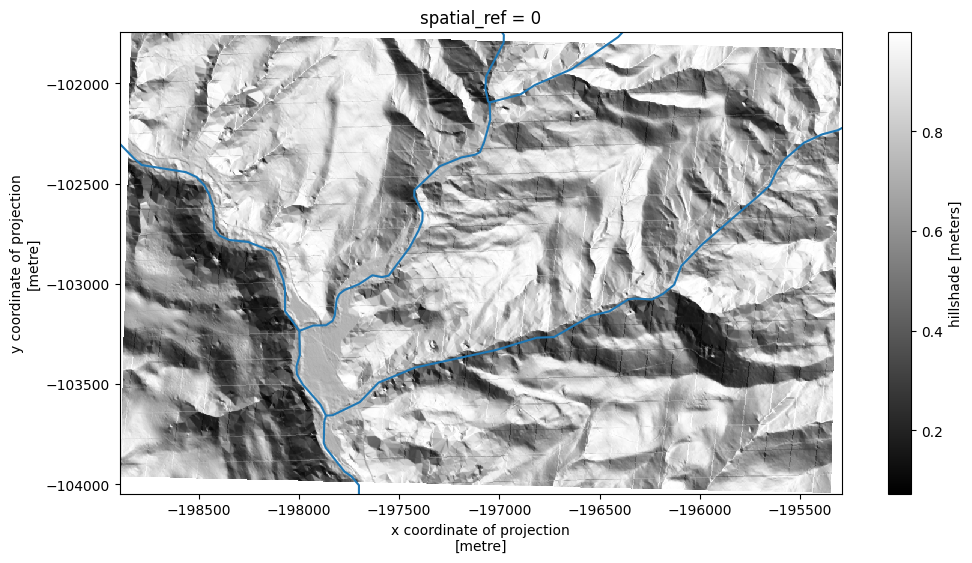

In [97]:
hillshade_3m = xrspatial.hillshade(dem_3m)
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
hillshade_3m.plot(ax=ax, cmap='gray')
flow.plot(ax=ax)

In [99]:
# save dem and flowlines to toydata directory
dem_10m.rio.to_raster('../toy_data/dem_10m.tif')
dem_3m.rio.to_raster('../toy_data/dem_3m.tif')
flow.to_file('../toy_data/flowlines.shp')

/var/folders/l2/9h6xd6f555321vx3s_ttqb_80000gn/T/ipykernel_79046/2856058962.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  flow.to_file('../toy_data/flowlines.shp')
